In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
notas

x = np.array(notas['nota_1'], dtype=float)
y = np.array(notas['nota_2'], dtype=float)
z = np.array(notas['resultado'])


In [268]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

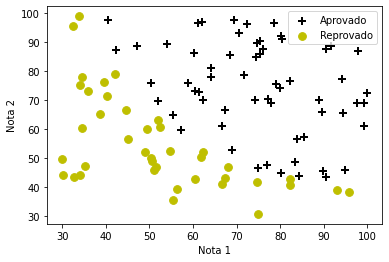

In [270]:
plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

In [271]:
def sigmoide(x,y,a,b,c):
  return (1.0 / (np.exp(-(x*a+y*b+c))))

In [272]:
def perdaCrossEntropy(n,p,z):
  return ((1.0/n) * (1.0 + np.sum(-z * np.log(p)) - np.sum((1 - z) * np.log(1 - p))))


z = f(x,y)

∂L/∂a = 1/N * X * (p(x,y) - z)

∂L/∂b = 1/N * Y * (p(x,y) - z)

∂L/∂c = 1/N * 1 * (p(x,y) - z)

In [273]:
def descidaDoGradiente(x, y, z, iteracoes = 1000, alfa = 1e-6,  limite_parada=1e-6):
   a = 0.1
   b = 0.001
   c = 4
   n = float(len(z))

   perda = []
   variacaoA = []
   variacaoB = []
   perdaAnterior = float('inf')

   count = 0

   for i in range(iteracoes):
     p = sigmoide(x, y, a, b, c)

     perdaAtual = perdaCrossEntropy(n,p,z)

     if abs(perdaAnterior - perdaAtual) <= limite_parada:
       count += 1
       return (a, b, c, perda, variacaoA, variacaoB, count)
         
     perdaAnterior = perdaAtual

     perda.append(perdaAtual)
     variacaoA.append(a)
     variacaoB.append(b)

     derivada_a = (1.0 / n) * np.sum(x * (p - z))
     derivada_b = (1.0 / n) * np.sum(y * (p - z))
     derivada_c = (1.0 / n) * np.sum(p - z)

     a = a - (alfa * derivada_a)
     b = b - (alfa * derivada_b)
     c = c - (alfa * derivada_c)
    

     count += 1
     
     return (a, b, c, perda, variacaoA, variacaoB,count)




In [274]:
a, b, c, perda, varicaoA, variacaoB, iteracoes = descidaDoGradiente(x=x, y=y, z=z)
a, b, c, perda2, varicaoA, variacaoB, iteracoes2 = descidaDoGradiente(x=x, y=y, z=z, alfa = 0.1, limite_parada=1e-3)
a, b, c, perda3, varicaoA, variacaoB, iteracoes3 = descidaDoGradiente(x=x, y=y, z=z, alfa = 0.01, limite_parada=1e-6)


print("a: {0}\nb: {1}\nc: {2}\niterações: {3}".format(a,b,c,iteracoes))

a: -157921.4670047195
b: -114778.69019212974
c: -1756.5409690734543
iterações: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


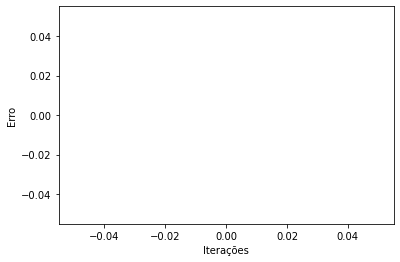

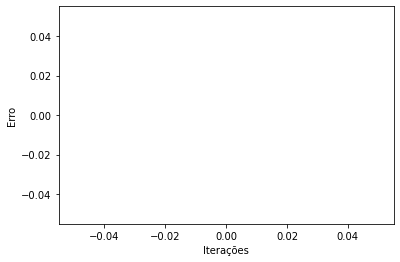

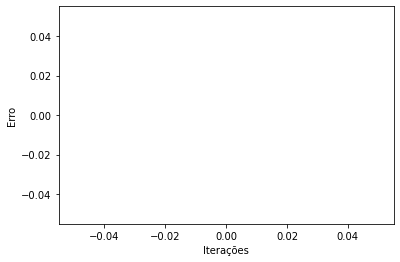

In [264]:
x = range(iteracoes)
plt.plot(x, perda)
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()

x = range(iteracoes2)
plt.plot(x, perda2)
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()

x = range(iteracoes3)
plt.plot(x, perda3)
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()